In [1]:
### Датасет загружен с Kaggle: https://www.kaggle.com/ruiqurm/lianjia?select=new.csv ###
### Импорт библиотек ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style("whitegrid")
from scipy.stats import norm
from scipy import stats
from plotnine import *
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn import ensemble
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor

In [47]:
# Датасет включает цены на дома в Пекине с 2011 по 2017 год, взят с сайта Lianjia.com и загружен на Kaggle

In [2]:
# Считываем датасет и сохраняем в df
df = pd.read_csv('new.csv.zip', parse_dates=["tradeTime"], encoding = "ISO-8859-1")

In [3]:
df.head(10)

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,¸ß 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,¸ß 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,ÖÐ 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,µ× 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,ÖÐ 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
5,https://bj.lianjia.com/chengjiao/101087277815....,101087277815,116.466280,39.991363,1111027377512,2016-07-22,861.0,57,275.6,52000,53.00,1,0,1,1,ÖÐ 8,4.0,2005,3,6,0.333,1.0,1.0,0.0,7,67738.0
6,https://bj.lianjia.com/chengjiao/101087292623....,101087292623,116.482586,39.891991,1111027380683,2016-07-14,851.0,167,275.0,37672,73.00,2,1,1,1,¸ß 6,4.0,1997,4,2,0.500,0.0,0.0,0.0,7,50112.0
7,https://bj.lianjia.com/chengjiao/101087303800....,101087303800,116.453917,39.881534,1111027381879,2016-09-07,904.0,138,800.0,49521,161.55,3,2,1,2,¸ß 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
8,https://bj.lianjia.com/chengjiao/101087463212....,101087463212,116.555729,40.162058,1111027379605,2016-09-04,873.0,218,134.0,27917,48.00,1,0,1,1,¸ß 10,3.0,2009,1,2,0.333,0.0,0.0,0.0,13,44235.0
9,https://bj.lianjia.com/chengjiao/101087508625....,101087508625,116.453086,39.898397,1111027374519,2016-09-05,865.0,134,380.0,55883,68.00,1,0,0,0,ÖÐ 23,1.0,2009,4,6,0.308,1.0,1.0,1.0,1,78590.0


In [4]:
df.shape

(318851, 26)

In [5]:
df.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,3.188510e+05,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1.129113e+12,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2.363447e+12,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


In [6]:
### Удаляем ненужные колонки ###
df.drop("Cid", axis = 1, inplace=True)
df.drop("id", axis = 1, inplace=True)
df.drop("url", axis = 1, inplace=True)
df.drop("price", axis = 1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Lng                  318851 non-null  float64       
 1   Lat                  318851 non-null  float64       
 2   tradeTime            318851 non-null  datetime64[ns]
 3   DOM                  160874 non-null  float64       
 4   followers            318851 non-null  int64         
 5   totalPrice           318851 non-null  float64       
 6   square               318851 non-null  float64       
 7   livingRoom           318851 non-null  object        
 8   drawingRoom          318851 non-null  object        
 9   kitchen              318851 non-null  int64         
 10  bathRoom             318851 non-null  object        
 11  floor                318851 non-null  object        
 12  buildingType         316830 non-null  float64       
 13  constructionTi

In [8]:
df.floor.value_counts()

ÖÐ 6       34788
¶¥ 6       22763
¸ß 6       20904
µÍ 6       15737
µ× 6       13338
           ...  
Î´Öª 29        2
µÍ 2           1
µÍ 35          1
µÍ 5           1
µÍ 63          1
Name: floor, Length: 203, dtype: int64

In [9]:
# В колонке floor (11) есть иероглифы, мешающие переводу в числовые значения, надо их убрать

In [10]:
# Убираем все нечисловые значения для колонки № 11 (floor) ### 
df.iloc[:, 11] = np.array(df.iloc[:, 11].str.extract("([0-9]+)")).reshape(-1, 1)

In [11]:
# Переводим значения из object в int или float64
col = [7, 8, 10, 11, 13]
for i in col:
    df.iloc[:, i] = pd.to_numeric(df.iloc[:, i], errors='coerce')

In [19]:
# Убеждаемся, что все object переведены в числовые значения
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Lng                  318851 non-null  float64       
 1   Lat                  318851 non-null  float64       
 2   tradeTime            318851 non-null  datetime64[ns]
 3   followers            318851 non-null  int64         
 4   totalPrice           318851 non-null  float64       
 5   square               318851 non-null  float64       
 6   livingRoom           318819 non-null  float64       
 7   drawingRoom          318819 non-null  float64       
 8   kitchen              318851 non-null  int64         
 9   bathRoom             318849 non-null  float64       
 10  floor                318819 non-null  float64       
 11  buildingType         316830 non-null  float64       
 12  constructionTime     299568 non-null  float64       
 13  renovationCond

In [12]:
### Список колонок, содержащих NaN-значения ###
df.columns[df.isna().any()].tolist()  

['DOM',
 'livingRoom',
 'drawingRoom',
 'bathRoom',
 'floor',
 'buildingType',
 'constructionTime',
 'elevator',
 'fiveYearsProperty',
 'subway',
 'communityAverage']

In [15]:
# Процент NaN-значений
df.isna().mean() * 100

Lng                     0.000000
Lat                     0.000000
tradeTime               0.000000
DOM                    49.545713
followers               0.000000
totalPrice              0.000000
square                  0.000000
livingRoom              0.010036
drawingRoom             0.010036
kitchen                 0.000000
bathRoom                0.000627
floor                   0.010036
buildingType            0.633838
constructionTime        6.047652
renovationCondition     0.000000
buildingStructure       0.000000
ladderRatio             0.000000
elevator                0.010036
fiveYearsProperty       0.010036
subway                  0.010036
district                0.000000
communityAverage        0.145209
dtype: float64

In [16]:
# В колонке DOM очень много пропусков (около 50 %), поэтому удаляем её
df.drop(['DOM'], axis = 1, inplace = True)

In [17]:
# Заменяем пропущенные значения в колонках fiveYearsProperty, elevator и subway на 0
df['fiveYearsProperty'].fillna(0, inplace=True)  # либо да (1), либо нет (0)
df['elevator'].fillna(0, inplace=True)  # лифт либо есть (1), либо нет (0)
df['subway'].fillna(0, inplace=True)  # метро либо есть (1), либо нет (0)

In [24]:
# Заменяем все NaN на медиану
df = df.fillna(df.median())
df.isna().sum()

Lng                    0
Lat                    0
tradeTime              0
followers              0
totalPrice             0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
floor                  0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
dtype: int64

In [25]:
df.columns

Index(['Lng', 'Lat', 'tradeTime', 'followers', 'totalPrice', 'square',
       'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'floor',
       'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty',
       'subway', 'district', 'communityAverage'],
      dtype='object')

In [26]:
# В X заносим все колонки, кроме целевой, а также убираем широту, долготу, время на рынке и среднюю цену по округу
# В y как обычно заносим целевую переменную
X = df.drop(['Lng', 'Lat', 'tradeTime', 'totalPrice', 'communityAverage'], axis=1)
y = df['totalPrice']

In [27]:
# Разделяем датасет на train и test с соотношением 80 / 20
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.2)

In [28]:
# Проверяем размер получившихся тренировочной и тестовой выборок
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(255080, 16)
(255080,)
(63771, 16)
(63771,)


Feature 0 : 3.077
Feature 1 : 26.871
Feature 2 : 14.096
Feature 3 : 7.877
Feature 4 : 4.138
Feature 5 : 7.388
Feature 6 : 2.571
Feature 7 : 1.358
Feature 8 : 6.118
Feature 9 : 6.828
Feature 10 : 3.004
Feature 11 : 1.218
Feature 12 : 3.204
Feature 13 : 1.797
Feature 14 : 2.037
Feature 15 : 1.247



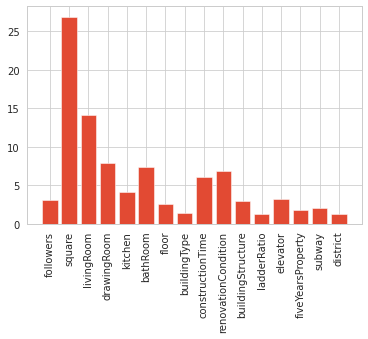

In [36]:
Kbest_classif = SelectKBest(score_func=f_classif, k=6)
Kbest_classif.fit(X_train, y_train)

# Смотрим на значимость наших признаков
for i in range(len(Kbest_classif.scores_)):
    print(f'Feature {i} : {round(Kbest_classif.scores_[i],3)}')

print()

plt.bar([X_train.columns[i] for i in range(len(Kbest_classif.scores_))], Kbest_classif.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

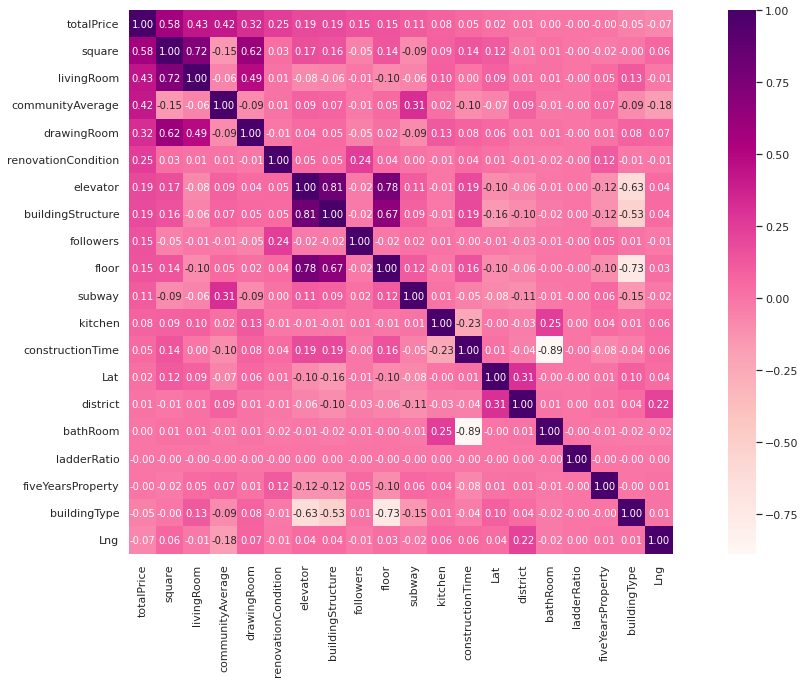

In [37]:
def corrmatrix(df,target_col,num=len(df)):
    corrmatrix = df.corr()
    plt.figure(figsize = (20,10))
    columnss = corrmatrix.nlargest(num, target_col)[target_col].index
    cm = np.corrcoef(df[columnss].values.T)
    sns.set(font_scale = 1)
    hm = sns.heatmap(cm, cbar = True, annot = True, square = True, cmap = "RdPu" ,  fmt = ".2f", annot_kws = {"size": 10},
                     yticklabels = columnss.values, xticklabels = columnss.values)
    plt.show()

# Строим матрицу корреляций признаков
target = 'totalPrice'
corrmatrix(df, target)

In [38]:
def remove_outlier(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1  #Interquartile range
    outlier = []
    for i in df[col_name]:
        if i < (q1 - 1.5 * iqr) or i > (q3 + 1.5 * iqr):
            outlier.append(i)
    outlier = pd.DataFrame(outlier, columns=['outlier'])
    print('There is {}% Outlier removed in {} according to IQR rule'.format(round((outlier.shape[0]/df.shape[0])*100,2),col_name))
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df = df[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
    return df
    
def visualize_target(df, feature):
    print('Feature: {}, Skewness: {}, Kurtosis: {}'.format(feature,round(df[feature].skew(),5),round(df[feature].kurt(),5)))
    
    fig = plt.figure(constrained_layout=True, figsize=(12,6))
    grid = gridspec.GridSpec(ncols=5, nrows=5, figure=fig)

    ax1 = fig.add_subplot(grid[0:2, :4])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:,feature], norm_hist=True,fit=norm, ax = ax1,color='indianred')

    ax2 = fig.add_subplot(grid[2:, :4])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ax3 = fig.add_subplot(grid[:, 4])
    ax3.set_title('Box Plot')
    sns.boxplot(y=df.loc[:,feature], orient='v', ax = ax3,color='indianred')

Feature: totalPrice, Skewness: 4.71937, Kurtosis: 148.66104


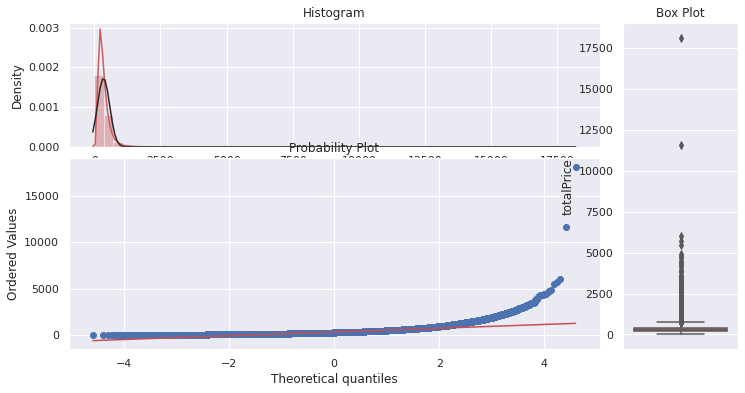

In [39]:
visualize_target(df, target)

In [40]:
df = remove_outlier(df, target)  # Удаляем выбросы

There is 4.93% Outlier removed in totalPrice according to IQR rule


In [41]:
# Логарифмирование целевой переменной
df["totalPrice"] = np.log(df["totalPrice"])

Feature: totalPrice, Skewness: -2.75983, Kurtosis: 33.88031


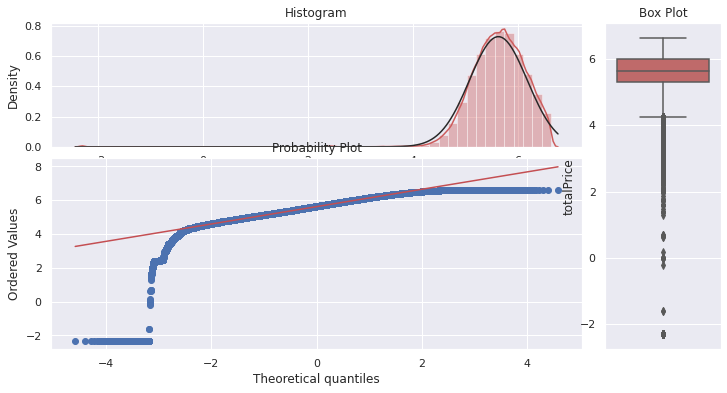

In [42]:
visualize_target(df, target)

In [29]:
# Масштабируем признаки при помощи StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 169.9064
Train RMSE = 170.9510


In [33]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

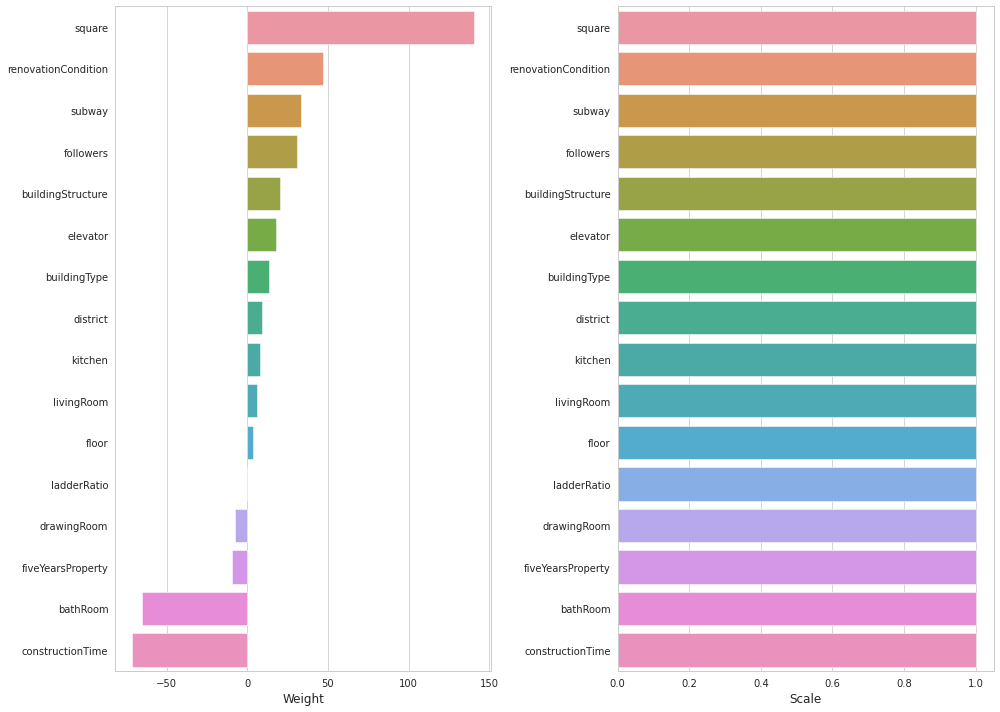

In [34]:
# Визуализируем отмастшабированные признаки
scales = pd.Series(data=X_train_scaled.std(axis=0))
show_weights(X_train, model.coef_, scales)

Best alpha = 1000.0000


Text(0, 0.5, 'CV score')

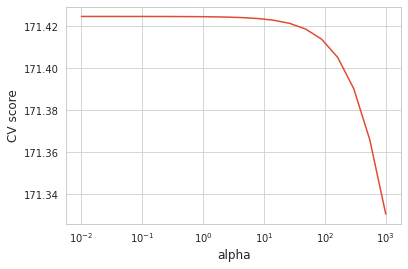

In [31]:
# Подбираем гиперпараметр альфа

from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=10)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [35]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Ridge(best_alpha))
])

model = simple_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 169.6816


In [43]:
# R2 Коэффициент детерминации — это доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью зависимости, то есть объясняющими переменными
# RMSE Корень из средней квадратической ошибки MSE (Root-mean-square deviation)

r2 = []
model = []
RMSE = []
regressor = [LinearRegression(), RandomForestRegressor(), KNeighborsRegressor(), ensemble.GradientBoostingRegressor(), LGBMRegressor(), XGBRegressor()]
for obj in regressor:
    model_name = type(obj).__name__
    obj.fit(X_train, y_train)
    predict=obj.predict(X_test)
    r2.append(r2_score(y_test, predict))
    model.append(model_name)
    RMSE.append(mean_squared_error(y_test, predict, squared=False))
models = pd.DataFrame({'Model': model, 'r2': r2, 'RMSE': RMSE})
print(models)

[13:56:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                       Model        r2        RMSE
0           LinearRegression  0.439791  169.906666
1      RandomForestRegressor  0.734000  117.078249
2        KNeighborsRegressor  0.546538  152.864243
3  GradientBoostingRegressor  0.673892  129.633156
4              LGBMRegressor  0.711904  121.843897
5               XGBRegressor  0.672635  129.882620


In [54]:
results_df = pd.DataFrame()
columns = ["Model", "Cross Val Score", "MAE", "MSE", "RMSE", "R2"]

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

def append_results(model_name, model, results_df, y_test, pred):
    results_append_df = pd.DataFrame(data=[[model_name, *evaluate(y_test, pred) , cross_val_score(model, X, y, cv=10).mean()]], columns=columns)
    results_df = results_df.append(results_append_df, ignore_index = True)
    return results_df

In [57]:
results_df = pd.DataFrame()
columns = ["Model", "Cross Val Score", "MAE", "MSE", "RMSE", "R2"]

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

def append_results(model_name, model, results_df, y_test, pred):
    results_append_df = pd.DataFrame(data=[[model_name, *evaluate(y_test, pred) , cross_val_score(model, X, y, cv=10).mean()]], columns=columns)
    results_df = results_df.append(results_append_df, ignore_index = True)
    return results_df

In [65]:
models = models.set_index('Model')
plt.figure(figsize=(20,5))
models['RMSE'].sort_values().plot(kind='barh', color='blue', align='center')
plt.title('RMSE for models')

KeyError: ignored

In [44]:
# Лучшие результаты R2 и RMSE у RandomForestRegressor

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
RFReg = RandomForestRegressor(max_depth = 200, random_state = 0)
RFReg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=200, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [46]:
RFReg.predict(X_test)
RFReg.score(X_test, y_test)

0.7333129533513127

In [48]:
# Подбор лучших гиперпараметров для RandomForestRegressor
# Закомментил, так как исполнение занимает 30+ минут

#%time
#params = {'n_estimators': [100, 200], 'max_depth': [None, 1], 'min_samples_split': [5, 10]}
#clf = GridSearchCV(ensemble.RandomForestRegressor(), params, cv=5, 
#                   n_jobs=-1, verbose=1)
#clf.fit(X_train, y_train)
#print(clf.best_estimator_)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 43.6min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [49]:
# Результат подбора параметров:
# RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
#                       max_depth=None, max_features='auto', max_leaf_nodes=None,
#                       max_samples=None, min_impurity_decrease=0.0,
#                       min_impurity_split=None, min_samples_leaf=1,
#                       min_samples_split=10, min_weight_fraction_leaf=0.0,
#                       n_estimators=200, n_jobs=None, oob_score=False,
#                       random_state=None, verbose=0, warm_start=False)

In [50]:
RFRegOptimized = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
RFRegOptimized.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [51]:
RFRegOptimized.predict(X_test)
RFRegOptimized.score(X_test, y_test)

0.7381120660256888

In [59]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_scaled, y_train)

pred = lin_reg.predict(X_test_scaled)

results_df = append_results("Linear Regression",  LinearRegression(), results_df, y_test, pred)
results_df

,Model,Cross Val Score,MAE,MSE,RMSE,R2
0,Linear Regression,116.061567,28868.275209,169.906666,0.439791,0.123806


In [60]:
from sklearn.linear_model import Ridge

model = Ridge(alpha = 1000)
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)
results_df = append_results("Ridge Regression",  Ridge(), results_df, y_test, pred)
results_df

,Model,Cross Val Score,MAE,MSE,RMSE,R2
0,Linear Regression,116.061567,28868.275209,169.906666,0.439791,0.123806
1,Ridge Regression,116.019862,28791.848165,169.681608,0.441274,0.123807


In [61]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_test)
results_df = append_results("Lasso Regression",  Lasso(), results_df, y_test, pred)
results_df

,Model,Cross Val Score,MAE,MSE,RMSE,R2
0,Linear Regression,116.061567,28868.275209,169.906666,0.439791,0.123806
1,Ridge Regression,116.019862,28791.848165,169.681608,0.441274,0.123807
2,Lasso Regression,116.077244,28943.578685,170.128124,0.438329,0.124567


In [62]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_test)
results_df = append_results("ElasticNet Regression",  ElasticNet(), results_df, y_test, pred)
results_df

,Model,Cross Val Score,MAE,MSE,RMSE,R2
0,Linear Regression,116.061567,28868.275209,169.906666,0.439791,0.123806
1,Ridge Regression,116.019862,28791.848165,169.681608,0.441274,0.123807
2,Lasso Regression,116.077244,28943.578685,170.128124,0.438329,0.124567
3,ElasticNet Regression,117.134464,29715.272049,172.381182,0.423354,0.111063


In [64]:
model = RFRegOptimized
model.fit(X_train, y_train)
pred = model.predict(X_test)
results_df = append_results("RandomForestRegressor",  model, results_df, y_test, pred)
results_df

,Model,Cross Val Score,MAE,MSE,RMSE,R2
0,Linear Regression,116.061567,28868.275209,169.906666,0.439791,0.123806
1,Ridge Regression,116.019862,28791.848165,169.681608,0.441274,0.123807
2,Lasso Regression,116.077244,28943.578685,170.128124,0.438329,0.124567
3,ElasticNet Regression,117.134464,29715.272049,172.381182,0.423354,0.111063
4,RandomForestRegressor,75.847014,13504.624347,116.209399,0.737933,0.188914
